In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import seaborn as sns
import pandas as pd
from pathlib import Path
from math import ceil

<Axes: xlabel='Number of training samples', ylabel='MSE'>

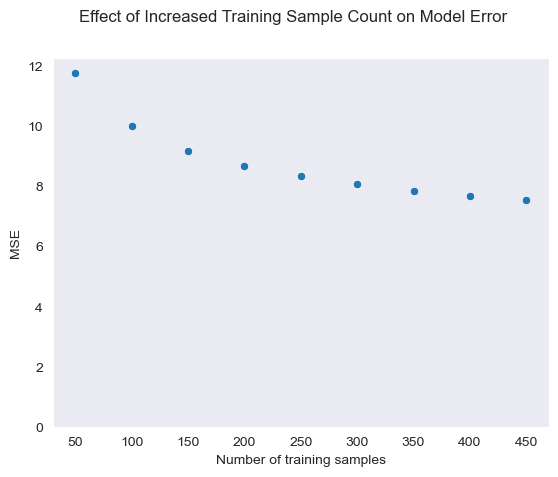

In [18]:
sns.set_style("dark")
fig, ax = plt.subplots()
step = 50
n_points = np.arange(50, 500, step)
inv = 10/(np.emath.logn(100, n_points))
logs = np.array(np.log(n_points).tolist()[::-1])
error = inv
offset = .5
ax.set_ylabel("MSE")
ax.set_xlabel("Number of training samples")
ax.set_ylim(0, error.max() + offset)
fig.suptitle("Effect of Increased Training Sample Count on Model Error")
sns.scatterplot(x = n_points, y = error)

In [23]:
## New Plot

input_path = Path("durr_burger.csv")
df = pd.read_csv(input_path, header=0, index_col=None)
# for col in df.columns.tolist():
#     print(col)
regs = [
    'ARDRegression', 'AdaBoostRegressor', 'BaggingRegressor', 'BayesianRidge', 'DecisionTreeRegressor', 'ElasticNet', 'ExtraTreeRegressor', 'ExtraTreesRegressor', 'GammaRegressor', 'GradientBoostingRegressor', 'HistGradientBoostingRegressor', 'HuberRegressor', 'KNeighborsRegressor', 'Lars', 'Lasso', 'LassoLars', 'LassoLarsIC', 'LinearRegression', 'LinearSVR', 'NuSVR', 'OrthogonalMatchingPursuit', 'PLSRegression', 'PassiveAggressiveRegressor', 'PoissonRegressor', 'RANSACRegressor', 'RadiusNeighborsRegressor', 'RandomForestRegressor', 'Ridge', 'SVR', 'TransformedTargetRegressor', 'TweedieRegressor'
]

keep_regs = [reg for reg in regs if any(1 for col in df.columns.tolist() if reg in col)]
n_regs = len(keep_regs)


sns.set_style("dark")
fig, axs = plt.subplots(nrows=ceil(n_regs / 4), ncols=4)
for i in range(len(keep_regs)):
    reg, ax = keep_regs[i], axs[i // 4][i % 4]
    train_sub = df[["percent_training_data", f"{reg}-Mean Absolute Error-train"]].values.T
    test_sub = df[["percent_training_data", f"{reg}-Mean Absolute Error-test"]].values.T
    ax.scatter(train_sub[0], train_sub[1], c = "red")
    ax.scatter(test_sub[0], test_sub[1], c = "blue")
    ax.set_ylabel("MAE")
    ax.set_xlabel("% of Training Data Used")
    # ax.set_ylim(0, error.max() + offset)
    ax.set_title(reg)
    # sns.scatterplot(x = n_points, y = error, ax=ax)
    
plt.tight_layout()
plt.show()

1.0